<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/tech_bad_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./tech_scraping.xlsx')
grade_2 = text['star grade'] <= 2.0

df_grade2 = text[grade_2]
df_grade2['star grade'].value_counts()

df_grade2.head(10)

,star grade,review
0,1.5,둘다 *근에 팔았어요.\n\n와치페이스 최악\n문의답변도 성의 없고 너무 오래 걸리...
5,1.0,추가 밴드가 불량입니다. 펀딩 이후 곧바로 시중에서 더 저렴하게 구매가 가능했네요.
7,2.0,싸게 잘 산 것 뿐
17,2.0,와디즈 펀딩이 더 저렴한거 맞아요?
20,2.0,TANY6 인가 사고나서 깨달은...\n이 시계가 엄청나게 연결이 잘된다는걸...
21,1.0,후회막심이다\n와디즈는 못믿겠다\n저 금액이면 충분히 검증된 기성 유명브랜드 훨씬 ...
23,1.0,지금 이라도 환불이 된다면 하구 싶다.
24,1.0,배송비 환불 못받음
34,1.0,착용한지 몇달 됐는데 착용하고 있는 손목에 화상입은것처럼 흉터? 수포?가 생겼습니다...
36,1.0,스트랩안주시나요? 돈벌고 잠수타셨나요 ?


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11601,), (11601,), (3867,), (3867,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

647       화면이 째깍째깍 안 뜬다손목 들어올릴 때 화면이 늦게 뜬다 알림에 다른 앱이 추가...
12622    제품은 정말 좋습니다저소음에 가습효과 짱짱한 가습기라 만족도는 좋습니다 가격면에서도...
10639    소통은 안해봐서 모르겠고 품질은 생각보다 별로에요 이 금액주고 살건 아닌듯해요 자르...
12739                                       눈과 피부에 기쁨을 주네요
10071    소음 금이간듯한 디자인  바람세기 등 생각했던 것 보다 생각보다 쓰기 어려운 것 같습니다
                               ...                        
12350    눌러서 연결해 놓아도 살짝 들면 빠집니다 옆으로 고정하고 사용은 못할듯 합니다배송 ...
4020     아이폰 업데이트나 기기변경 후 일어나는 문제들이 많이 일어나고 있는데 아무 대처도 ...
14579    제 인생에 처음 사용해본 무선 이어폰입니다 사용감에 있어서 보관하기에 케이스가 둥글...
349      알림과 진동도 적당한 것 같고 세세한 조정과 번역은 미흡하지만큰 화면의 액정이 보기...
9172     지금 앵콜펀딩이더라구요 ㅎㅎㅎㅎ 너무 잘 쓰고 있습니다형한테도 하나 선물했었는데 저...
Name: review, Length: 11601, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['1',
  '.',
  '화면',
  '째깍째깍',
  '뜬다',
  '(',
  '손목',
  '어',
  '올릴',
  '화면',
  '늦',
  '게',
  '뜬다',
  ')',
  '2',
  '.',
  '알림',
  '앱',
  '추가',
  '된다',
  '제',
  '건지',
  '.',
  '.',
  '추가',
  '는데',
  '누가',
  '추가',
  '방법',
  '알려',
  '세요',
  '!',
  '!'],
 ['제품',
  '정말',
  '습니다',
  '.',
  '저소음',
  '가습',
  '효과',
  '짱짱',
  '가습기',
  '라',
  '만족도',
  '습니다',
  '.',
  '가격',
  '면',
  '에서',
  '도',
  '용량',
  '대비',
  '가습기',
  '훌륭',
  '합니다',
  '.',
  '개선',
  '다면',
  '물통',
  '본체',
  '체결',
  '시',
  '맞물리',
  '구간',
  '찾',
  '기',
  '은근',
  '힘들',
  '어요',
  '.',
  '주일',
  '넘',
  '게',
  '매일',
  '사용',
  '지만',
  '여전히',
  '부분',
  '익숙',
  '해지지',
  '습니다',
  '.',
  '본체',
  '랑',
  '스탠드',
  '물통',
  '표시',
  '선',
  '으면',
  '쉽',
  '게',
  '사용',
  '가능',
  '을까',
  '합니다',
  '.',
  '스탠드',
  '에서',
  '물통',
  '을',
  '빼',
  '고',
  '꽂',
  '게',
  '스탠드',
  '가볍',
  '기',
  '지만',
  '덜렁거리',
  '불편',
  '네요',
  '.',
  '나중',
  '개선',
  '품',
  '을',
  '내놓',
  '으신다면',
  '스탠드',
  '본체',
  '고정',
  '장치',
  '추가',
  '했',
  '으면',
  '겠',
  '습니다',
  '.

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
texts = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='gray',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(texts)

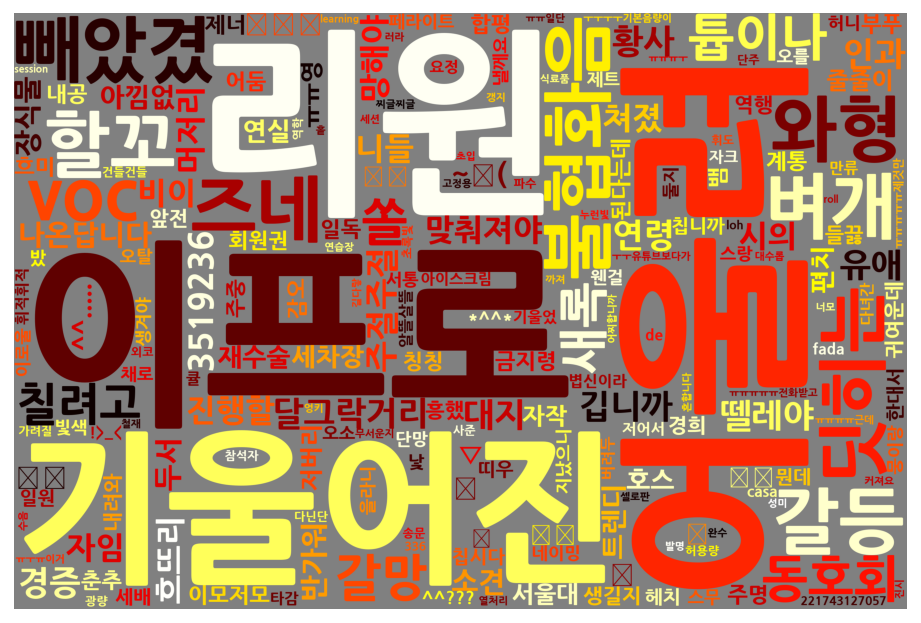

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()